In [170]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy import stats



#Display all columns
pd.set_option('display.max_columns', None)

Load Dataset

In [83]:
# Import dataset
churn_data = pd.read_csv(r"C:\Users\omweg\Desktop\Data Analysis\Project Dataset\Sets\Telco Customer Churn Dataset\telco.csv")

In [84]:
churn_data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [85]:
churn_data.tail()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,Landers,92285,34.341737,-116.539416,2182,Q3,No,0,72,NaN,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,Adelanto,92301,34.667815,-117.536183,18980,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,Amboy,92304,34.559882,-115.637164,42,Q3,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,Angelus Oaks,92305,34.167800,-116.864330,301,Q3,Yes,1,11,NaN,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN
7042,3186-AJIEK,Male,44,No,No,No,No,0,United States,California,Apple Valley,92308,34.424926,-117.184503,28819,Q3,No,0,66,NaN,Yes,30.96,No,Yes,Fiber Optic,11,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,105.65,6844.50,0.00,0,2043.36,8887.86,4,Stayed,No,38,5097,NaN,NaN


In [86]:
churn_data. sample(9)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
6929,3508-CFVZL,Female,55,No,No,No,No,0,United States,California,El Monte,91731,34.079934,-118.046695,30211,Q3,No,0,71,Offer A,Yes,49.52,Yes,Yes,Fiber Optic,19,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Credit Card,111.30,7985.90,0.00,0,3515.92,11501.82,3,Stayed,No,46,5957,NaN,NaN
1264,2024-BASKD,Female,23,Yes,No,No,No,0,United States,California,Exeter,93221,36.301689,-119.018233,13333,Q3,No,0,1,Offer E,Yes,22.16,No,Yes,Fiber Optic,47,No,No,Yes,No,No,No,No,No,Month-to-Month,Yes,Mailed Check,74.60,74.60,0.00,10,22.16,106.76,3,Churned,Yes,94,3860,Competitor,Competitor offered more data
5573,7550-WIQVA,Male,34,No,No,Yes,Yes,1,United States,California,Rocklin,95677,38.790400,-121.236973,21510,Q3,Yes,3,50,NaN,Yes,41.58,Yes,Yes,Fiber Optic,19,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,108.25,5431.40,0.00,0,2079.00,7510.40,4,Stayed,No,71,4972,NaN,NaN
4915,3812-LRZIR,Female,51,No,No,Yes,Yes,1,United States,California,Desert Hot Springs,92240,33.948558,-116.516976,22796,Q3,Yes,1,27,NaN,Yes,35.52,Yes,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,No,Bank Withdrawal,24.50,761.95,0.00,0,959.04,1720.99,3,Stayed,No,67,2645,NaN,NaN
4851,9552-TGUZV,Male,57,No,No,Yes,No,0,United States,California,Upland,91784,34.141146,-117.655583,23331,Q3,Yes,8,8,Offer E,Yes,20.67,No,Yes,Fiber Optic,18,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,75.00,658.10,0.00,0,165.36,823.46,3,Stayed,No,80,5413,NaN,NaN
3655,7801-CEDNV,Male,33,No,No,Yes,No,0,United States,California,Inglewood,90304,33.936827,-118.359824,28680,Q3,Yes,10,27,NaN,Yes,9.01,No,Yes,DSL,5,Yes,No,No,No,No,No,No,Yes,One Year,No,Credit Card,48.70,1421.75,0.00,0,243.27,1665.02,3,Stayed,No,30,3560,NaN,NaN
1766,3030-YZADT,Male,57,No,No,No,No,0,United States,California,Grass Valley,95949,39.099204,-121.137962,17922,Q3,No,0,9,Offer E,Yes,2.88,No,Yes,DSL,26,No,No,No,No,No,No,No,No,Month-to-Month,No,Mailed Check,44.95,431.00,0.00,10,25.92,466.92,1,Churned,Yes,66,5023,Competitor,Competitor had better devices
6649,6000-UKLWI,Male,46,No,No,No,No,0,United States,California,Sacramento,95842,38.687367,-121.348480,31373,Q3,No,0,41,NaN,Yes,36.76,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,No,Credit Card,20.15,802.35,29.95,0,1507.16,2279.56,3,Stayed,No,47,4982,NaN,NaN
5265,5016-LIPDW,Male,45,No,No,Yes,Yes,2,United States,California,Stanford,94305,37.424342,-122.165641,13386,Q3,Yes,1,57,NaN,Yes,41.56,No,No,NaN,0,No,No,No,No,No,No,No,No,One Year,No,Credit Card,19.40,1061.60,0.00,0,2368.92,3430.52,5,Stayed,No,53,4194,NaN,NaN


In [87]:
# View the dataframe metrics
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [88]:
# check for duplicates
churn_data.duplicated().sum()

np.int64(0)

Data is based off the USA, in the state of Califonia during the 3rd Quater of provided home phone and Internet services.

with various cities present that are identified using Zip codes.

The latitude and and logitude give an estimated location of where the state is located on the map.

Population of the state the customer.

Referred a friend(Yes or No), number of referrals they brought in.

Tenure in months- how long the customer has stayed with the company till the end of the 3rd quarter.

Offer is the last type of marketing offer they received from the company.

Avg . monthly long distance charge is the average amount of money the customer pays each month for long distance services.

Multiple lines are the multiple telephone services the customer has with the company.

Internet types is internt services the company has to offer.

Avg Monthly GB Download is the GB the customer has used.

Online Security, Online Backup, Device Protection Plan, Premium Tech Support shows if the customer has payed to experience these services.

Streaming TV, Streaming Movies, Streaming Music shows how the customers use their internet services.

Unlimited Data if the customer uses unlimited data services.

Contract shows the type of contract the customer has with the company.

Paperless Billing shows if the customer has opted for paperless billing.

Payment Method shows the method the customer uses to pay their bills.

Monthly Charge is the amount they pay per month.

Total Charges is the toatl for the 3quater.

Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue is the amont for the quater

Satisfaction Score based of a scale of 1 to 5(very satisfied)

Customer Status is the presence of the customer by the end of the 3rd quarter.-its indicated by the churn lable.

Churn Score: the higher the value the more likely they are to leave.

CLTV : Value of the customer to the company over their lifetime, the higher it is the more they should be monitored to leave.

Churn Category and Churn Reason are the reasons why the customer left the company.

# Data cleaning

In [89]:
churn=churn_data

# Handling missing values
churn.isnull().sum()
# Fill missing values with "Unknown"
categories_cols = ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']
for col in categories_cols:
    churn[col].fillna('Unknown', inplace=True)
churn.sample(9)

C:\Users\omweg\AppData\Local\Temp\ipykernel_5744\2801346241.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn[col].fillna('Unknown', inplace=True)


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
4057,5498-IBWPI,Female,34,No,No,Yes,Yes,2,United States,California,Guadalupe,93434,34.936000,-120.594655,5726,Q3,Yes,1,66,Offer A,Yes,48.11,No,Yes,Cable,27,No,No,No,Yes,No,No,No,Yes,One Year,Yes,Credit Card,49.40,3251.85,0.00,0,3175.26,6427.11,3,Stayed,No,59,5232,Unknown,Unknown
371,6284-AHOOQ,Male,71,No,Yes,No,No,0,United States,California,Avenal,93204,35.916943,-120.129921,14697,Q3,No,0,22,Unknown,Yes,46.11,Yes,Yes,Fiber Optic,27,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,90.50,1910.60,0.00,0,1014.42,2925.02,1,Churned,Yes,71,5014,Other,Don't know
1165,0404-SWRVG,Male,21,Yes,No,No,Yes,2,United States,California,La Habra,90631,33.940619,-117.951300,67354,Q3,No,0,3,Offer E,Yes,14.60,Yes,Yes,Fiber Optic,71,No,No,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,74.40,229.55,8.74,0,43.80,264.61,1,Churned,Yes,76,4415,Dissatisfaction,Product dissatisfaction
6265,9867-NNXLC,Female,43,No,No,No,No,0,United States,California,Pacific Grove,93950,36.618337,-121.926417,15449,Q3,No,0,22,Offer D,Yes,33.92,No,No,Unknown,0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,20.05,470.20,0.00,0,746.24,1216.44,5,Stayed,No,44,5555,Unknown,Unknown
5168,0670-KDOMA,Female,42,No,No,No,No,0,United States,California,Chowchilla,93610,37.100948,-120.270136,19391,Q3,No,0,1,Offer E,Yes,28.18,No,No,Unknown,0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,20.25,20.25,0.00,0,28.18,48.43,4,Joined,No,69,5854,Unknown,Unknown
2094,5134-IKDAY,Female,34,No,No,Yes,No,0,United States,California,Twain,95984,40.022184,-121.062384,73,Q3,Yes,1,1,Unknown,Yes,11.08,No,Yes,Fiber Optic,13,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,69.80,69.80,0.00,0,11.08,80.88,3,Churned,Yes,96,2123,Dissatisfaction,Service dissatisfaction
4321,6599-GZWCM,Female,39,No,No,No,No,0,United States,California,San Jose,95129,37.305622,-122.000887,37570,Q3,No,0,13,Unknown,Yes,42.62,No,Yes,Fiber Optic,15,No,Yes,No,No,No,No,No,Yes,One Year,Yes,Credit Card,74.65,966.25,0.00,0,554.06,1520.31,5,Stayed,No,40,4172,Unknown,Unknown
2568,3957-SQXML,Female,61,No,No,Yes,No,0,United States,California,Los Angeles,90068,34.137411,-118.328915,21728,Q3,Yes,10,34,Unknown,Yes,25.21,Yes,No,Unknown,0,No,No,No,No,No,No,No,No,Two Year,No,Credit Card,24.95,894.30,0.00,0,857.14,1751.44,3,Stayed,No,62,5408,Unknown,Unknown
3730,0973-KYVNF,Female,59,No,No,Yes,No,0,United States,California,Castaic,91384,34.506627,-118.699048,22177,Q3,Yes,6,72,Unknown,Yes,43.12,No,Yes,Cable,22,Yes,Yes,Yes,No,Yes,No,No,Yes,Two Year,Yes,Credit Card,70.65,5011.15,0.00,0,3104.64,8115.79,3,Stayed,No,75,5176,Unknown,Unknown


In [92]:
churning_df= churn
# Drop unique identifiers & non-essential columns
churning = churning_df.drop(['Customer ID', 'Zip Code', 'Latitude', 'Longitude'], axis=1)

# Drop single value columns
unique_values = churning.nunique() # Identify unique values in each column
to_drop = churning.loc[:, unique_values == 1].columns
churning = churning.drop(to_drop, axis=1)

In [93]:
churning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Under 30                           7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Number of Dependents               7043 non-null   int64  
 7   City                               7043 non-null   object 
 8   Population                         7043 non-null   int64  
 9   Referred a Friend                  7043 non-null   object 
 10  Number of Referrals                7043 non-null   int64  
 11  Tenure in Months                   7043 non-null   int64

In [ ]:
# view new dataset
churning.sample(9)

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
788,Female,73,No,Yes,No,No,0,Beverly Hills,11355,No,0,11,Unknown,Yes,2.81,Yes,Yes,DSL,3,Yes,No,No,No,No,No,No,Yes,Two Year,Yes,Bank Withdrawal,55.60,580.80,15.2,0,30.91,596.51,4,Stayed,No,80,5014,Unknown,Unknown
3831,Female,64,No,No,No,No,0,San Diego,42733,No,0,15,Offer D,Yes,39.49,No,No,Unknown,0,No,No,No,No,No,No,No,No,Two Year,No,Credit Card,19.60,331.60,0.0,0,592.35,923.95,3,Stayed,No,38,2722,Unknown,Unknown
2062,Male,56,No,No,No,No,0,Folsom,51855,No,0,43,Offer B,Yes,39.37,Yes,Yes,Fiber Optic,23,No,No,No,Yes,Yes,Yes,Yes,No,One Year,Yes,Bank Withdrawal,100.00,4211.55,0.0,140,1692.91,6044.46,1,Churned,Yes,93,4760,Dissatisfaction,Product dissatisfaction
6502,Male,27,Yes,No,Yes,No,0,Cazadero,1575,Yes,1,52,Unknown,Yes,8.94,Yes,Yes,Fiber Optic,85,No,Yes,No,Yes,No,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,95.65,5088.40,11.8,0,464.88,5541.48,3,Stayed,No,45,4465,Unknown,Unknown
5279,Female,44,No,No,Yes,No,0,Clayton,14239,Yes,1,70,Unknown,Yes,14.15,Yes,No,Unknown,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,26.00,2006.95,0.0,0,990.50,2997.45,4,Stayed,No,76,6170,Unknown,Unknown
6578,Female,56,No,No,Yes,Yes,1,El Dorado,4097,Yes,4,30,Offer C,Yes,36.74,No,Yes,Cable,18,No,No,Yes,Yes,Yes,No,No,Yes,One Year,Yes,Bank Withdrawal,64.50,1985.15,0.0,0,1102.20,3087.35,5,Stayed,No,60,2215,Unknown,Unknown
4094,Male,35,No,No,No,No,0,Valyermo,413,No,0,30,Offer C,Yes,47.06,No,Yes,Cable,24,Yes,No,Yes,No,No,No,No,Yes,Two Year,Yes,Mailed Check,55.65,1653.85,0.0,0,1411.80,3065.65,3,Stayed,No,70,5445,Unknown,Unknown
6125,Male,49,No,No,Yes,Yes,2,Santa Barbara,10986,Yes,5,25,Unknown,Yes,19.09,No,No,Unknown,0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,19.15,477.60,0.0,0,477.25,954.85,4,Stayed,No,57,3829,Unknown,Unknown
3525,Male,53,No,No,Yes,No,0,Bella Vista,899,Yes,10,30,Offer C,Yes,23.16,No,Yes,DSL,6,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.00,1474.90,0.0,0,694.80,2169.70,4,Stayed,No,29,4715,Unknown,Unknown


# Summary statistics

In [97]:
churning.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.00,32.000,46.00,60.000,80.00
Number of Dependents,7043.0,0.468692,0.962802,0.00,0.000,0.00,0.000,9.00
Population,7043.0,22139.603294,21152.392837,11.00,2344.000,17554.00,36125.000,105285.00
Number of Referrals,7043.0,1.951867,3.001199,0.00,0.000,0.00,3.000,11.00
Tenure in Months,7043.0,32.386767,24.542061,1.00,9.000,29.00,55.000,72.00
Avg Monthly Long Distance Charges,7043.0,22.958954,15.448113,0.00,9.210,22.89,36.395,49.99
Avg Monthly GB Download,7043.0,20.515405,20.418940,0.00,3.000,17.00,27.000,85.00
Monthly Charge,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.850,118.75
Total Charges,7043.0,2280.381264,2266.220462,18.80,400.150,1394.55,3786.600,8684.80
Total Refunds,7043.0,1.962182,7.902614,0.00,0.000,0.00,0.000,49.79


# Age Analysis

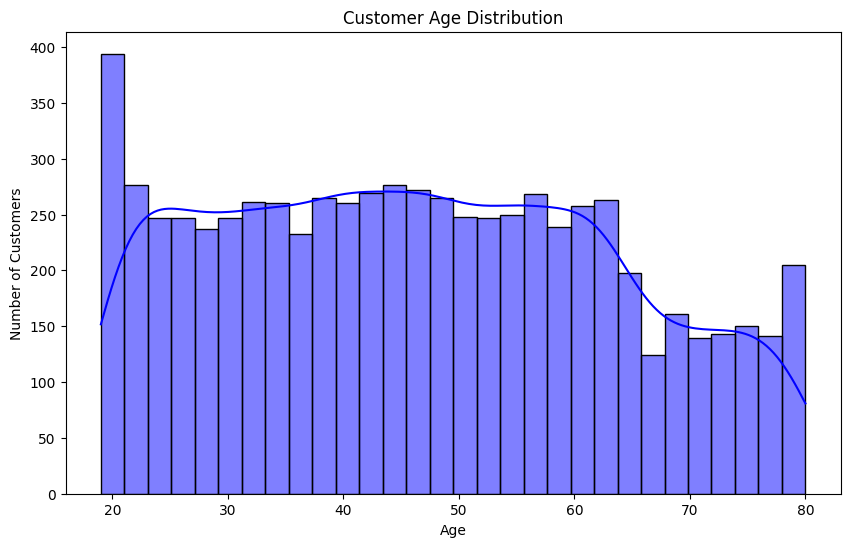

In [98]:
# Customer Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(churning['Age'], bins=30, color='blue', kde=True, edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\omweg\AppData\Local\Temp\ipykernel_5744\314155438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(churning['Gender'], palette='viridis')


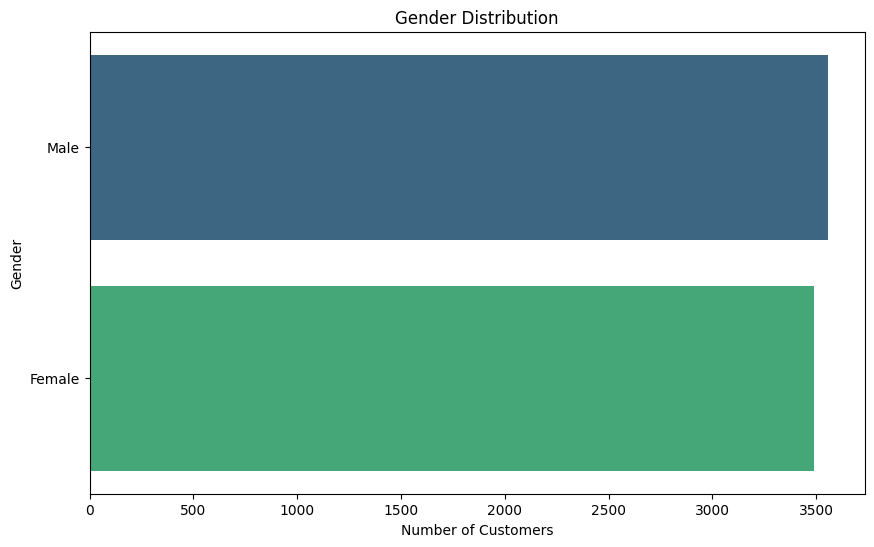

In [131]:
# Customer Gender distribution 
plt.figure(figsize=(10,6))
sns.countplot(churning['Gender'], palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Number of Customers')
plt.ylabel('Gender')
plt.show()

C:\Users\omweg\AppData\Local\Temp\ipykernel_5744\2119075442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn Category", y="Age", data=churning, palette="muted", split=True)


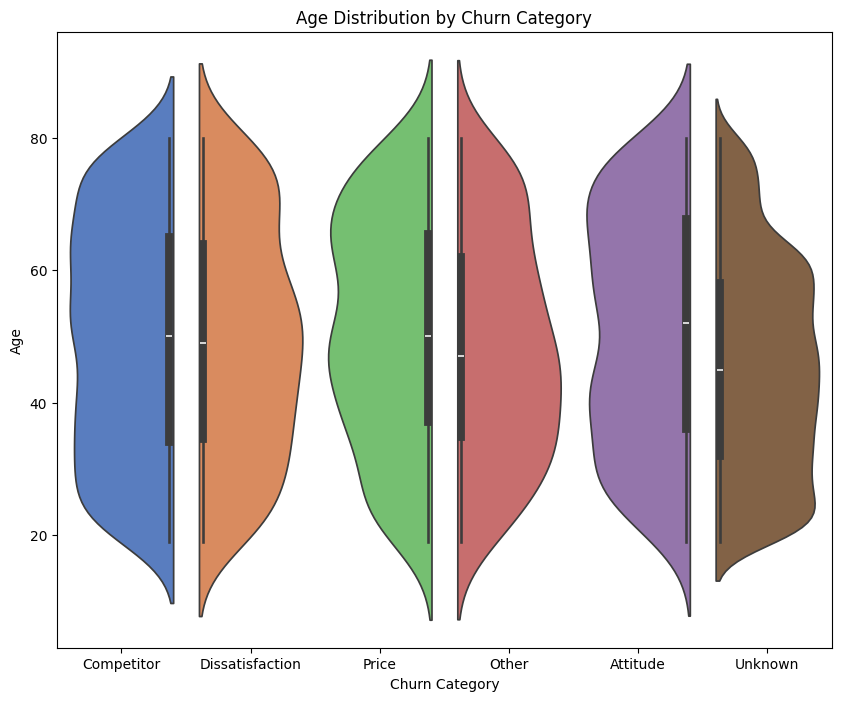

In [ ]:
# Customer Gender distribution by Churn Category
plt.figure(figsize=(10, 8)) 
sns.violinplot(x="Churn Category", y="Age", data=churning, palette="muted", split=True) 
plt.xlabel("Churn Category") 
plt.ylabel("Age") 
plt.title("Age Distribution by Churn Category") 
plt.show()

C:\Users\omweg\AppData\Local\Temp\ipykernel_5744\3542135086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender", y="Age", data=churning, palette="muted", split=True)


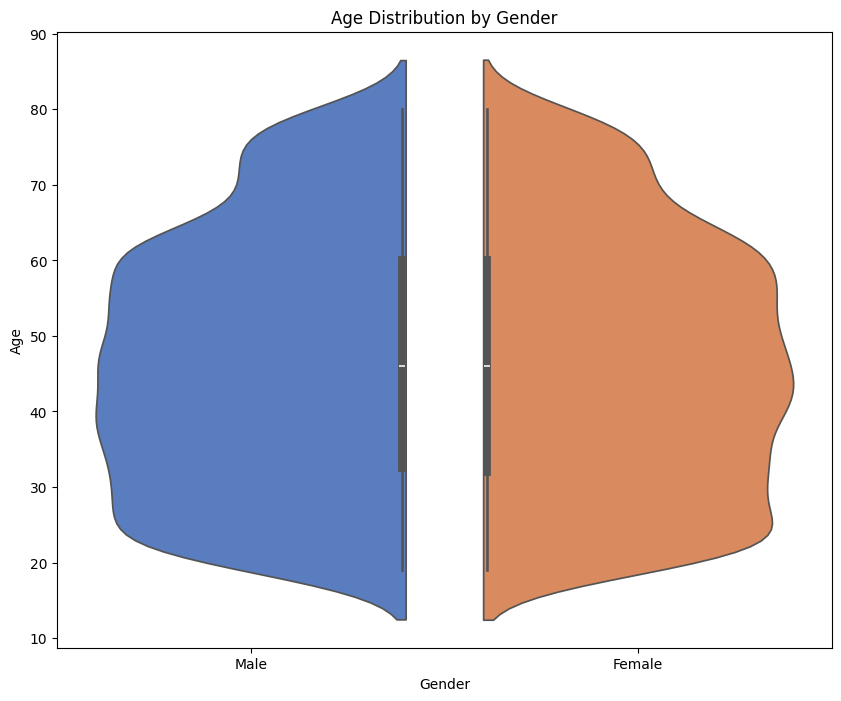

In [ ]:
# Age distribution by Gender
plt.figure(figsize=(10, 8)) 
sns.violinplot(x="Gender", y="Age", data=churning, palette="muted", split=True) 
plt.xlabel("Gender") 
plt.ylabel("Age") 
plt.title("Age Distribution by Gender") 
plt.show()

What percentage of customers churned?

C:\Users\omweg\AppData\Local\Temp\ipykernel_5744\1435083324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churning, x='Churn Label', palette='coolwarm')


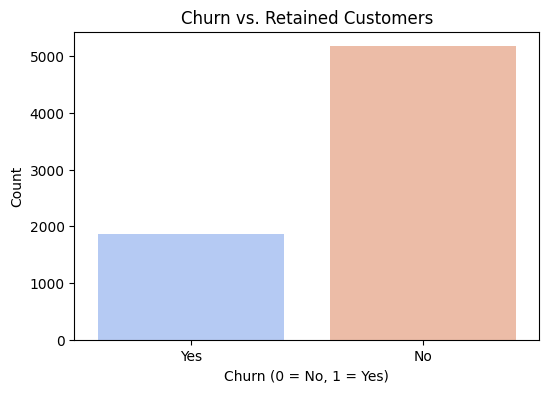

In [99]:
plt.figure(figsize=(6, 4))
sns.countplot(data=churning, x='Churn Label', palette='coolwarm')
plt.title("Churn vs. Retained Customers")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

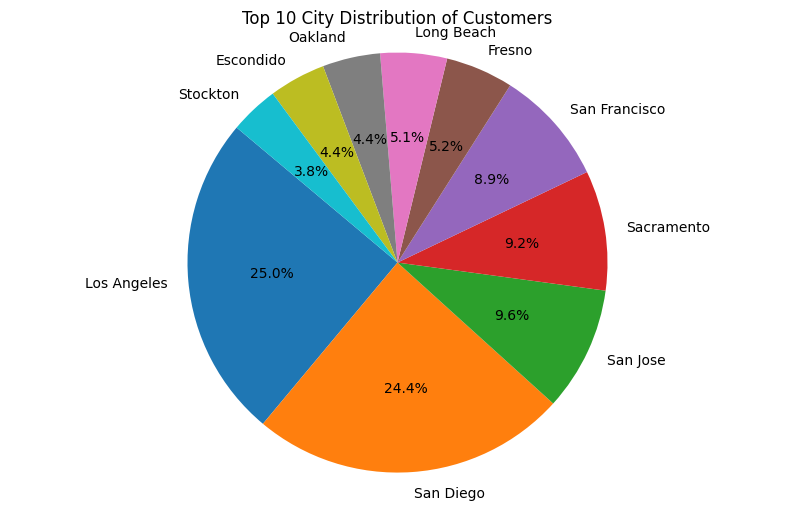

In [141]:
# Pie chart of the top 10 cities where customers are from
city_counts = churning['City'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 City Distribution of Customers')
plt.axis('equal')
plt.show()



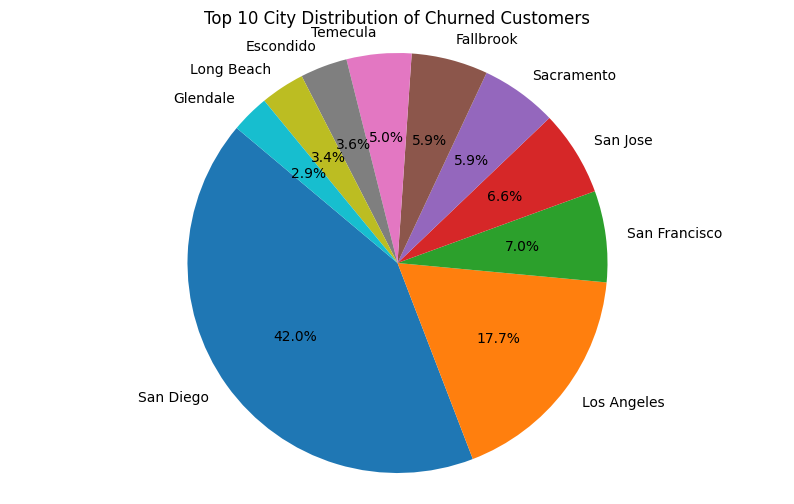

In [142]:
# Pie chart of the top 10 cities which experienced the most churning
churned_city_counts = churning[churning['Churn Label'] == 1]['City'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(churned_city_counts, labels=churned_city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 City Distribution of Churned Customers')
plt.axis('equal')
plt.show()

How does contract type affect churn?

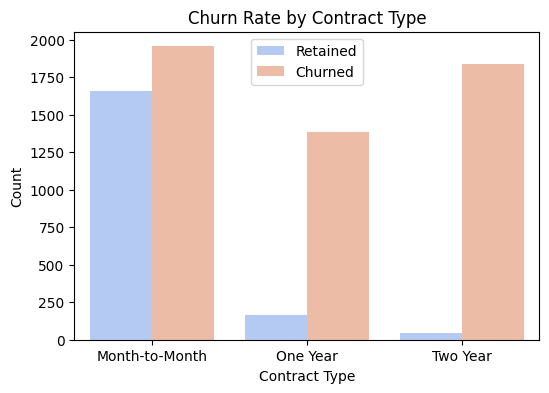

In [101]:
plt.figure(figsize=(6, 4))
sns.countplot(data=churning, x='Contract', hue='Churn Label', palette='coolwarm')
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(["Retained", "Churned"])
plt.show()

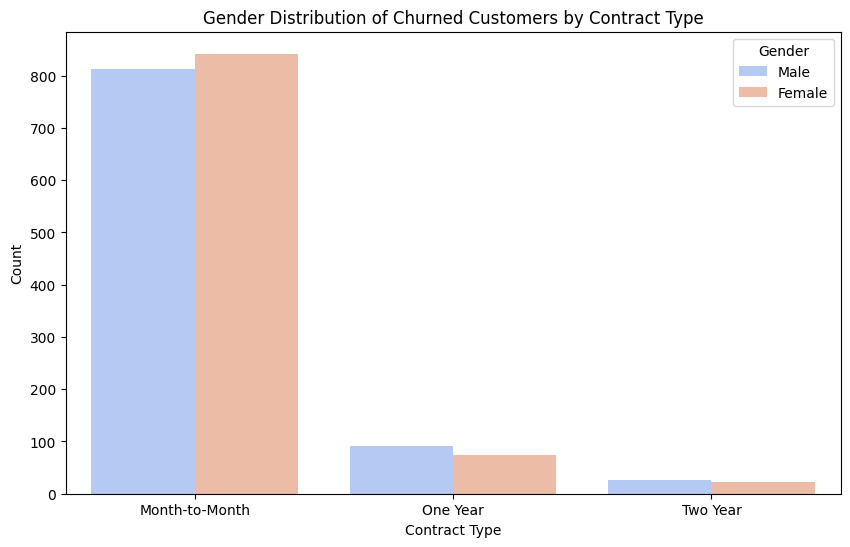

In [148]:
# Gender distribution that are more likely to churn due to contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=churning[churning['Churn Label'] == 1], x='Contract', hue='Gender', palette='coolwarm')
plt.title("Gender Distribution of Churned Customers by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

What is the relationship between tenure and churn?

C:\Users\omweg\AppData\Local\Temp\ipykernel_5744\1712660110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=churning, x='Churn Label', y='Tenure in Months', palette='coolwarm')


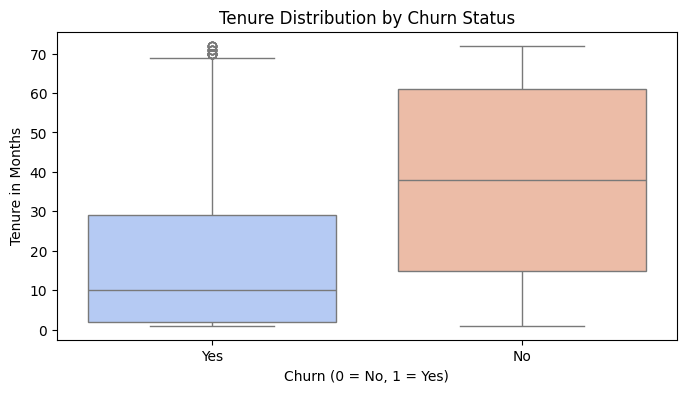

In [103]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=churning, x='Churn Label', y='Tenure in Months', palette='coolwarm')
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure in Months")
plt.show()

Does Monthly Charge impact churn?

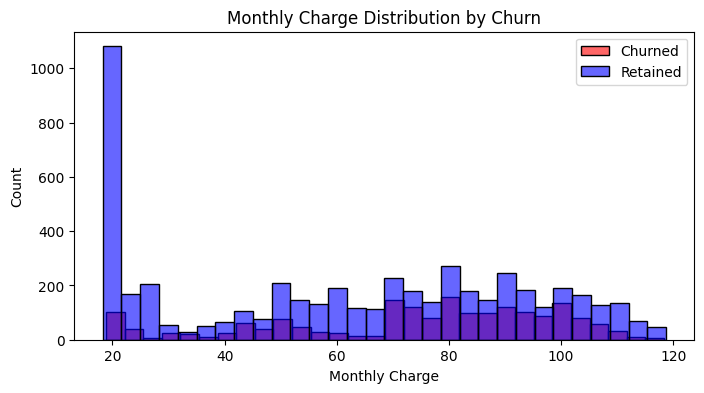

In [ ]:
churning['Churn Label'] = churning['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

plt.figure(figsize=(8, 4))
sns.histplot(churning[churning['Churn Label'] == 1]['Monthly Charge'], bins=30, color='red', alpha=0.6, label="Churned")
sns.histplot(churning[churning['Churn Label'] == 0]['Monthly Charge'], bins=30, color='blue', alpha=0.6, label="Retained")
plt.title("Monthly Charge Distribution by Churn")
plt.xlabel("Monthly Charge")
plt.legend()
plt.show()


 Does payment method impact churn?

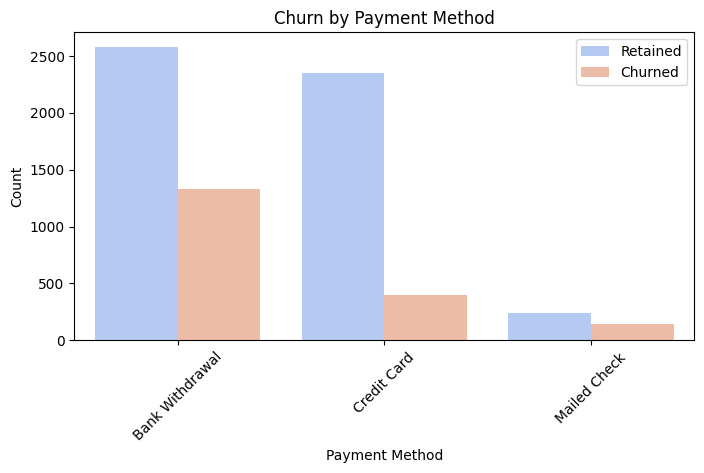

In [113]:
plt.figure(figsize=(8, 4))
sns.countplot(data=churning, x='Payment Method', hue='Churn Label', palette='coolwarm')
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(["Retained", "Churned"])
plt.show()


In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=churning, x='Payment Method', hue='Churn Label', palette='coolwarm')
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(["Retained", "Churned"])
plt.show()

 Does referring a friend reduce churn?

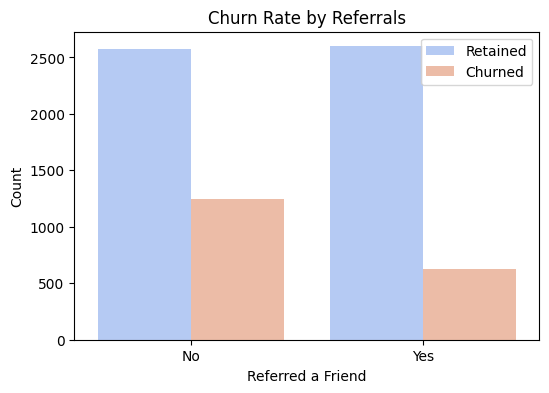

In [114]:
plt.figure(figsize=(6, 4))
sns.countplot(data=churning, x='Referred a Friend', hue='Churn Label', palette='coolwarm')
plt.title("Churn Rate by Referrals")
plt.xlabel("Referred a Friend")
plt.ylabel("Count")
plt.legend(["Retained", "Churned"])
plt.show()

Are senior citizens more likely to churn?

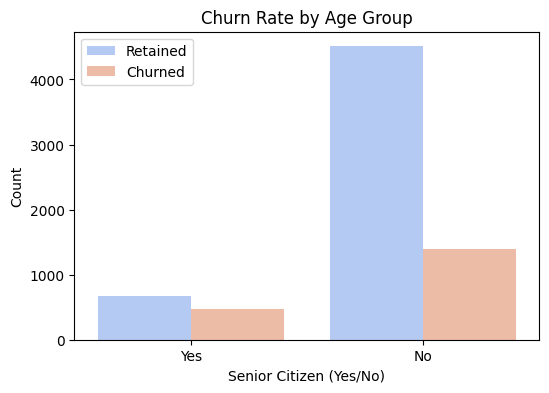

In [115]:

plt.figure(figsize=(6, 4))
sns.countplot(data=churning, x='Senior Citizen', hue='Churn Label', palette='coolwarm')
plt.title("Churn Rate by Age Group")
plt.xlabel("Senior Citizen (Yes/No)")
plt.ylabel("Count")
plt.legend(["Retained", "Churned"])
plt.show()

Which internet services are linked to higher churn?

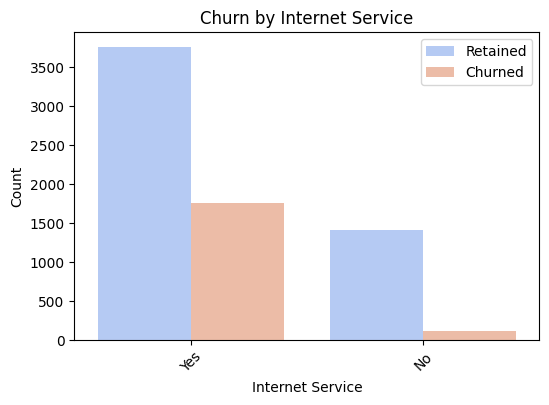

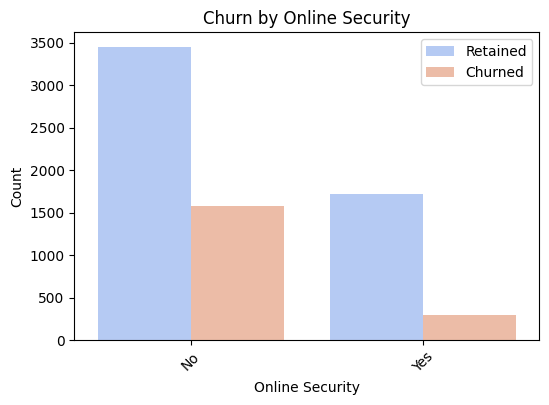

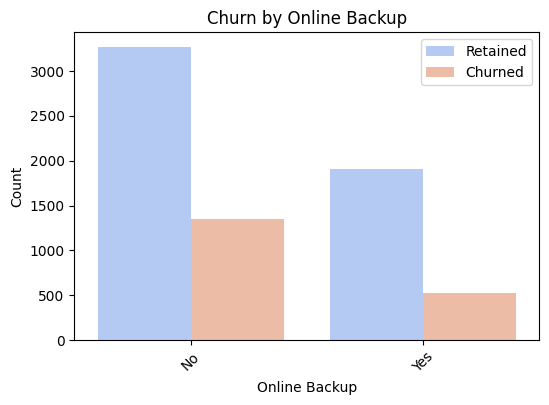

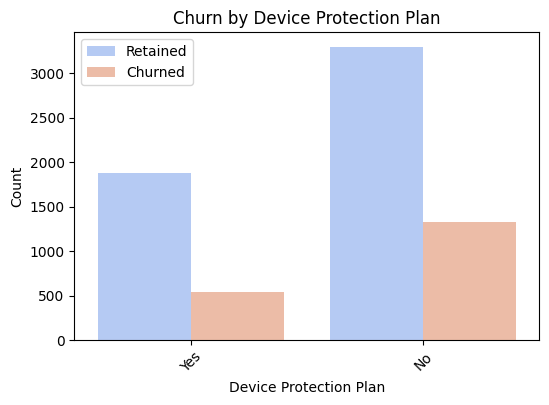

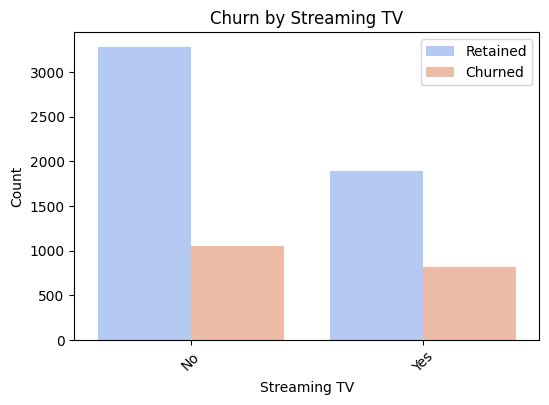

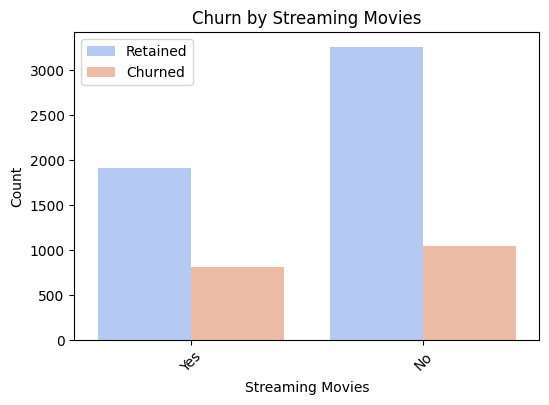

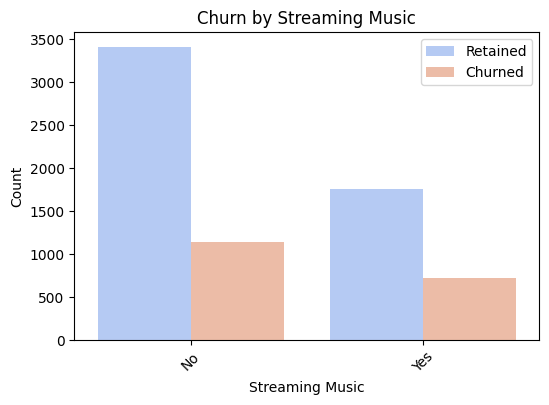

In [118]:
services = ['Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 
            'Streaming TV', 'Streaming Movies', 'Streaming Music']

for service in services:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=churning, x=service, hue='Churn Label', palette='coolwarm')
    plt.title(f"Churn by {service}")
    plt.xlabel(service)
    plt.ylabel("Count")
    plt.legend(["Retained", "Churned"])
    plt.xticks(rotation=45)
    plt.show()

What are the main churn reasons?

C:\Users\omweg\AppData\Local\Temp\ipykernel_5744\2944604254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_reasons.values, y=churn_reasons.index, palette='coolwarm')


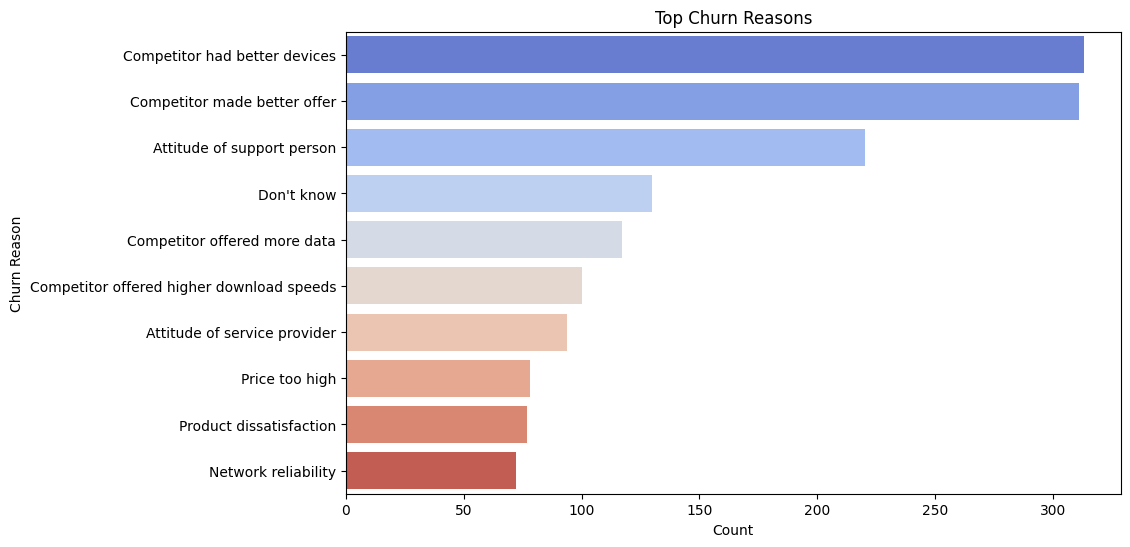

In [120]:
plt.figure(figsize=(10, 6))
churn_reasons = churning[churning['Churn Label'] == 1]['Churn Reason'].value_counts().head(10)
sns.barplot(x=churn_reasons.values, y=churn_reasons.index, palette='coolwarm')
plt.title("Top Churn Reasons")
plt.xlabel("Count")
plt.ylabel("Churn Reason")
plt.show()

C:\Users\omweg\AppData\Local\Temp\ipykernel_5744\2086768122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_reasons.values, y=churn_reasons.index, palette='coolwarm')


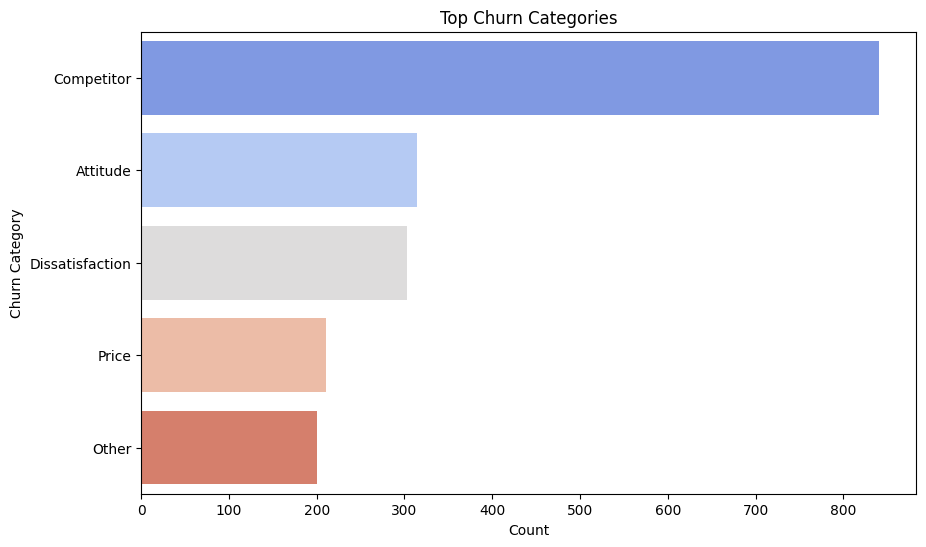

In [151]:
plt.figure(figsize=(10, 6))
churn_reasons = churning[churning['Churn Label'] == 1]['Churn Category'].value_counts()
sns.barplot(x=churn_reasons.values, y=churn_reasons.index, palette='coolwarm')
plt.title("Top Churn Categories")
plt.xlabel("Count")
plt.ylabel("Churn Category")
plt.show()

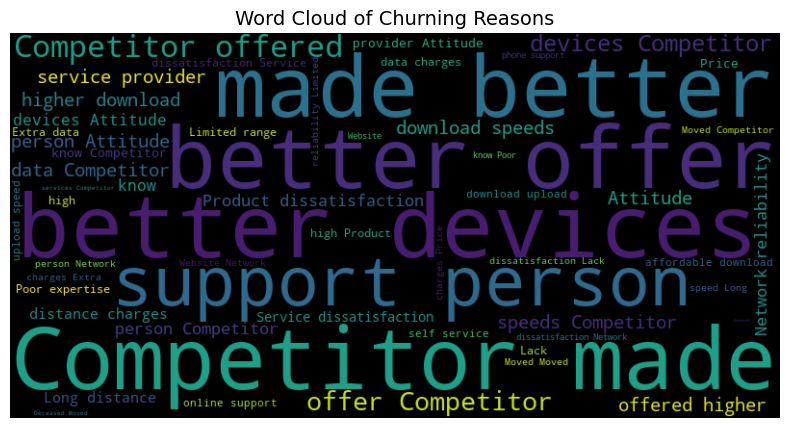

In [ ]:
# Combine all churn reasons into a single string
text_data = ' '.join(churning[churning['Churn Label'] == 1]['Churn Reason'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(
    width=800, height=400, background_color="black", colormap='viridis'
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Churning Reasons", fontsize=14)
plt.show()

# Hypothesis Testing

Case 1:
     Do Customers with a higher CLTV  less likely to churn?

- **Null (H₀):** CLTV is the same for churned and retained customers.
- **Alternative (H₁):** Customers with lower CLTV have a higher churn rate.

In [ ]:
# Separate the data into churned and retained customers
churned = churning[churning['Churn Label'] == 1]
retained = churning[churning['Churn Label'] == 0]

# Perform an independent t-test( since CLTV is continous)
t_stat, p_value = stats.ttest_ind(retained['CLTV'], churned['CLTV'], equal_var=False)

print("T-Test Results: CLTV vs Churn")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-Test Results: CLTV vs Churn
T-statistic: 10.690830470056563
P-value: 3.0489028460733125e-26


Case 2: Does type of the contract have an effect on the churning rate?

- **Null (H₀):**  Contract type has no effect on churning rate.
- **Alternative (H₁):** Contract type has an effect on the churning rate.

In [171]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(churning['Contract'], churning['Churn Label'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test Results for Contract Type vs. Churn:")
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


Chi-Square Test Results for Contract Type vs. Churn:
Chi-Square Statistic: 1445.2932428377585
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
 [[2652.01476643  957.98523357]
 [1138.67670027  411.32329973]
 [1383.3085333   499.6914667 ]]
